In [1]:
%pip install openbb -q

Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
botocore 1.31.20 requires urllib3<1.27,>=1.25.4, but you have urllib3 2.2.3 which is incompatible.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.8.0 which is incompatible.
torchvision 0.15.2 requires torch==2.0.1, but you have torch 2.2.0 which is incompatible.

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from openbb import obb

## About this Notebook
### Author - [Manya Sharma](https://github.com/manya706)

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1MoNxN-KZFRjot6_grD3KkH4OLDfehxMr?usp=sharing)

### Description
This notebook focuses on analyzing market volatility using historical stock data. We utilize the **OpenBB** to retrieve price data for multiple stocks and examine their behavior over time.

We explore various aspects of volatility and daily returns through statistical analysis and visualizations. Charts like scatter plots, box plots, and Bollinger Bands help us understand stock performance and identify trends or outliers. This analysis aims to provide insights that can aid in making informed investment decisions.




In [12]:
import pandas as pd

symbols = ['AAPL', 'GOOG', 'MSFT', 'NVDA']

for symbol in symbols:
    try:

        combined_data = obb.equity.price.historical(symbol=symbols, start_date="2010-01-01", provider="yfinance").to_df()
        combined_data.reset_index(inplace=True)
    except Exception as e:
        print(f"Failed to fetch data for {symbol}: {str(e)}")
combined_data


,date,open,high,low,close,volume,split_ratio,dividend,symbol
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,493729600,0.0,0.0,AAPL
1,2010-01-04,15.615220,15.678981,15.547723,15.610239,78541293,0.0,0.0,GOOG
2,2010-01-04,30.620001,31.100000,30.590000,30.950001,38409100,0.0,0.0,MSFT
3,2010-01-04,0.462750,0.465500,0.452750,0.462250,800204000,0.0,0.0,NVDA
4,2010-01-05,7.664286,7.699643,7.616071,7.656429,601904800,0.0,0.0,AAPL
...,...,...,...,...,...,...,...,...,...
14867,2024-10-09,134.110001,134.520004,131.380005,132.649994,246191600,0.0,0.0,NVDA
14868,2024-10-10,227.779999,229.500000,227.169998,229.039993,28084100,0.0,0.0,AAPL
14869,2024-10-10,162.110001,164.311005,161.639999,163.179993,12893500,0.0,0.0,GOOG
14870,2024-10-10,415.230011,417.350006,413.149994,415.839996,13807800,0.0,0.0,MSFT


## Line Plot of Closing Prices for Each Stock:

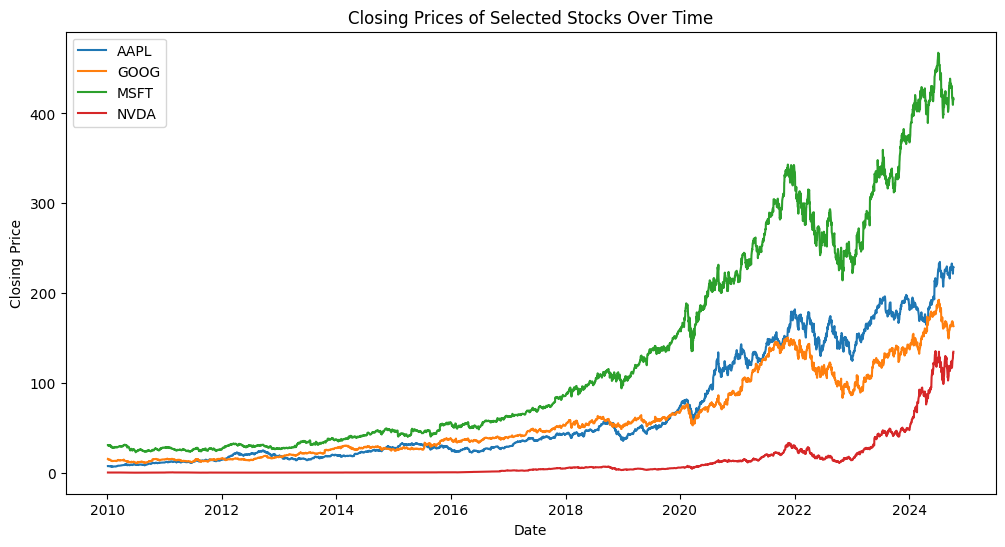

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for symbol in symbols:
    plt.plot(combined_data[combined_data['symbol'] == symbol]['date'],
             combined_data[combined_data['symbol'] == symbol]['close'], label=symbol)

plt.title('Closing Prices of Selected Stocks Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## Volatility Calculation (using daily returns and plotting):

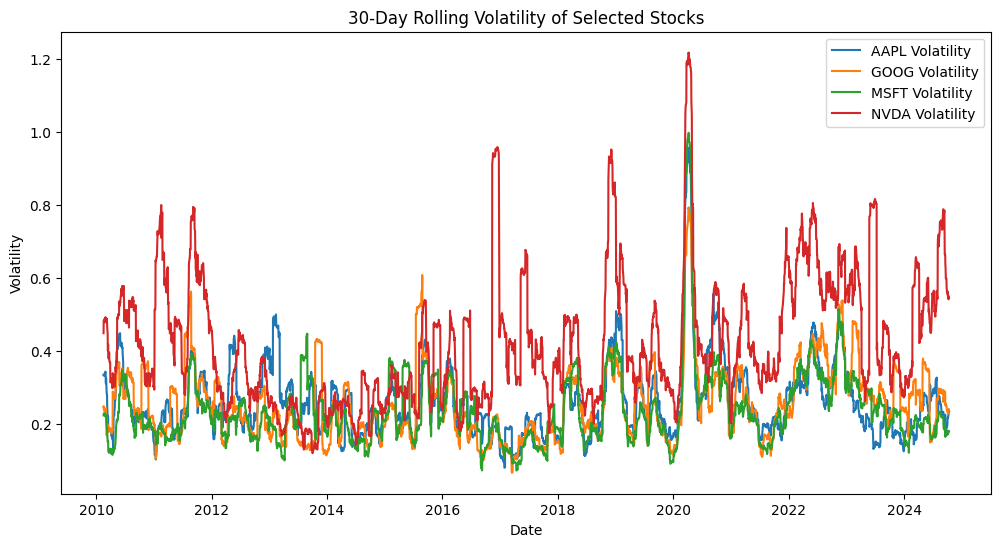

In [17]:
import numpy as np

combined_data['Daily_Return'] = combined_data.groupby('symbol')['close'].pct_change()

plt.figure(figsize=(12, 6))
for symbol in symbols:
    volatility = combined_data[combined_data['symbol'] == symbol]['Daily_Return'].rolling(window=30).std() * np.sqrt(252)
    plt.plot(combined_data[combined_data['symbol'] == symbol]['date'],
             volatility, label=f'{symbol} Volatility')

plt.title('30-Day Rolling Volatility of Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


## Histograms of Daily Returns (to see the distribution of volatility):

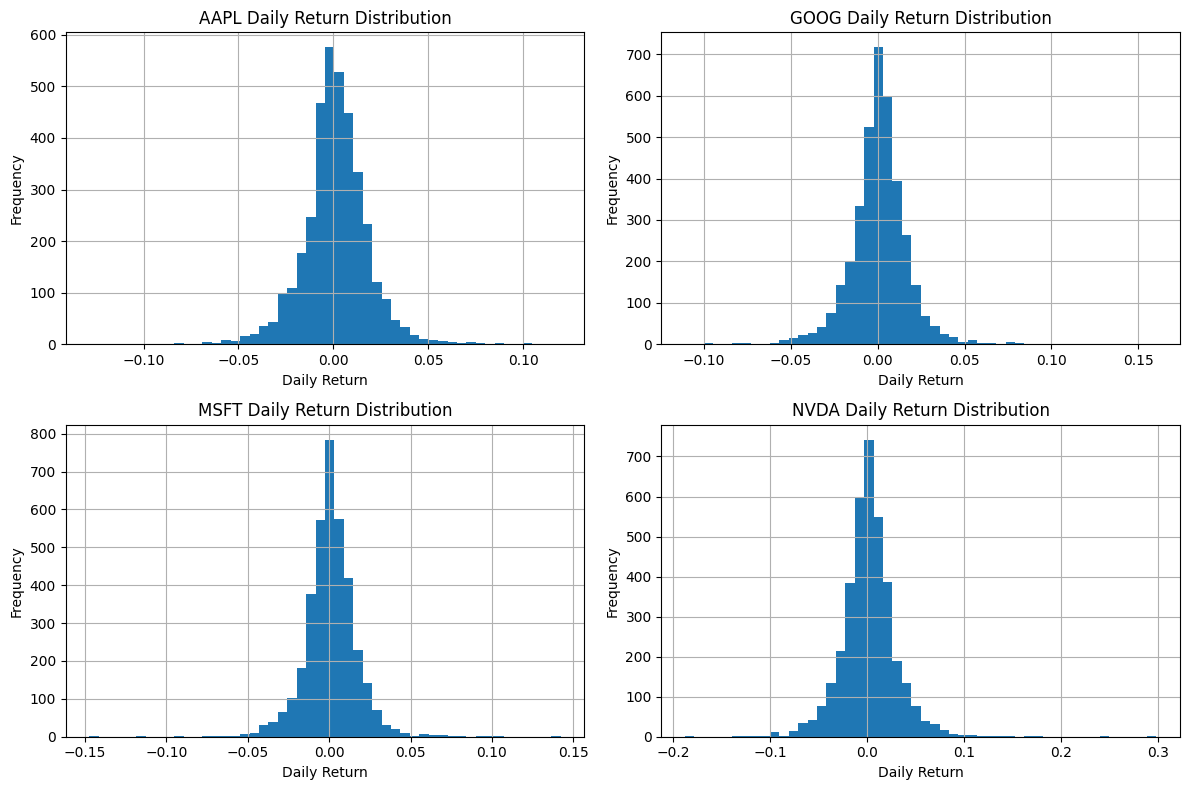

In [33]:
plt.figure(figsize=(12, 8))

for i, symbol in enumerate(symbols):
    plt.subplot(2, 2, i + 1)
    combined_data[combined_data['Symbol'] == symbol]['Daily_Return'].hist(bins=50)
    plt.title(f'{symbol} Daily Return Distribution')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##  Heatmap of Daily Returns Correlation:

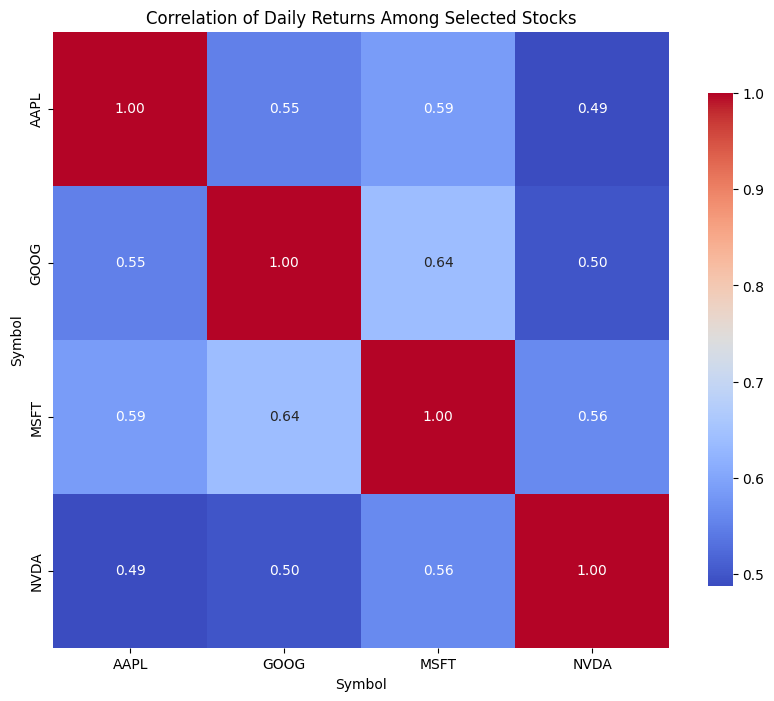

In [34]:
import seaborn as sns

correlation_matrix = combined_data.pivot_table(index='date', columns='Symbol', values='Daily_Return').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation of Daily Returns Among Selected Stocks')
plt.show()


## Volatility vs. Average Returns Scatter Plot

The Volatility vs. Average Returns Scatter Plot visually represents the relationship between the risk (volatility) and return of different stocks. The x-axis shows annualized volatility, while the y-axis indicates annualized average returns. Each point on the plot represents a stock, with those in the upper-right quadrant having high volatility and high returns, suggesting greater potential rewards accompanied by higher risk. This plot helps investors identify trends and correlations, enabling them to assess their risk tolerance and make informed investment decisions based on desired risk-return profiles.

<ipython-input-35-cca6392b6c69>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(symbol, (volatility[i], avg_returns[i]), textcoords="offset points", xytext=(0,10), ha='center')


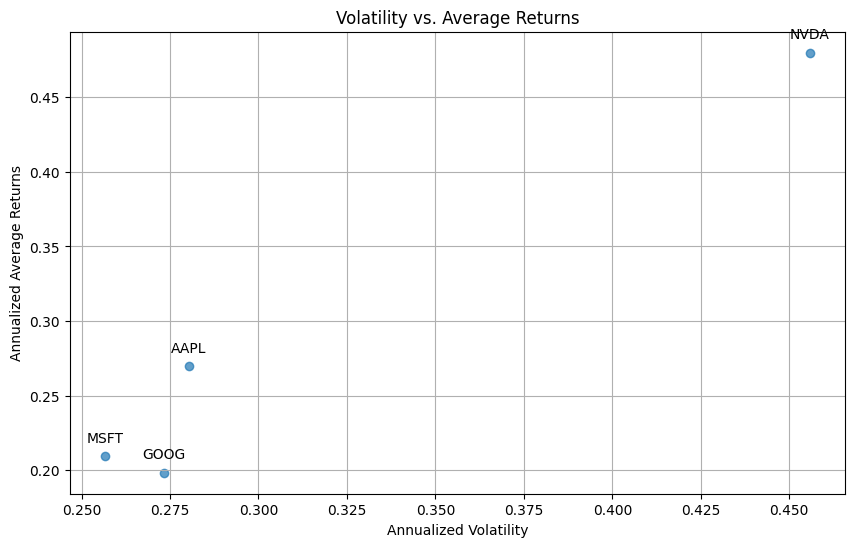

In [35]:
avg_returns = combined_data.groupby('Symbol')['Daily_Return'].mean() * 252
volatility = combined_data.groupby('Symbol')['Daily_Return'].std() * np.sqrt(252)

plt.figure(figsize=(10, 6))
plt.scatter(volatility, avg_returns, alpha=0.7)

for i, symbol in enumerate(symbols):
    plt.annotate(symbol, (volatility[i], avg_returns[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Volatility vs. Average Returns')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Average Returns')
plt.grid()
plt.show()


## Box Plot of Daily Returns:

The **Box Plot of Daily Returns** visually depicts the distribution of daily returns for each stock, highlighting key statistical metrics such as the median, quartiles, and potential outliers. This representation allows investors to quickly assess the variability and central tendency of returns, facilitating a better understanding of the stocks' performance and risk profile.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


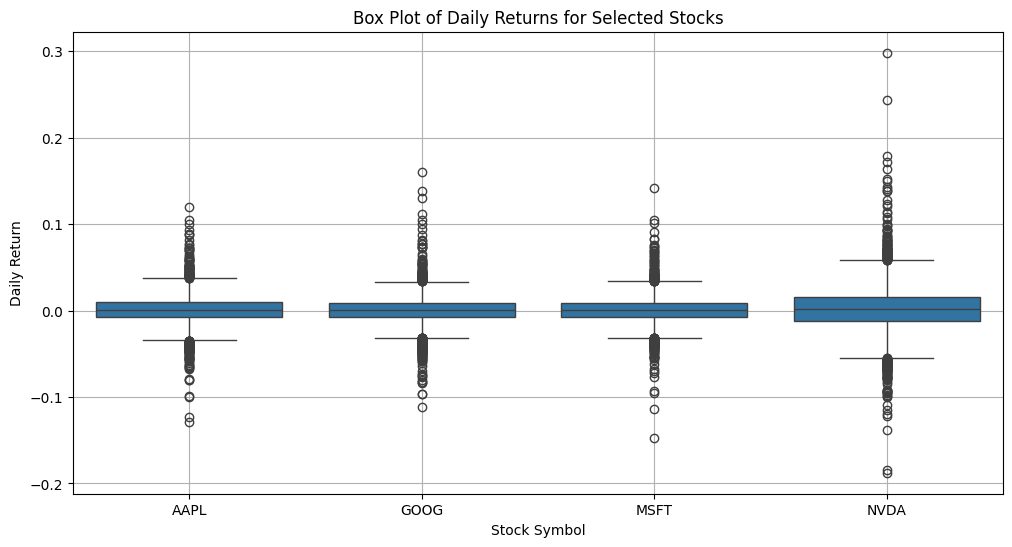

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Symbol', y='Daily_Return', data=combined_data)
plt.title('Box Plot of Daily Returns for Selected Stocks')
plt.xlabel('Stock Symbol')
plt.ylabel('Daily Return')
plt.grid()
plt.show()


## Bollinger Bands:

***Bollinger Bands are a technical analysis tool that consists of a middle line (the moving average) and two outer bands, which are standard deviations away from the moving average.*** This framework helps investors visualize price volatility and identify potential overbought or oversold conditions. *When the price approaches the upper band, it may indicate that the asset is overbought, while a drop to the lower band may suggest it is oversold*.

Bollinger Bands are effective for assessing market trends and making informed trading decisions based on price movements.

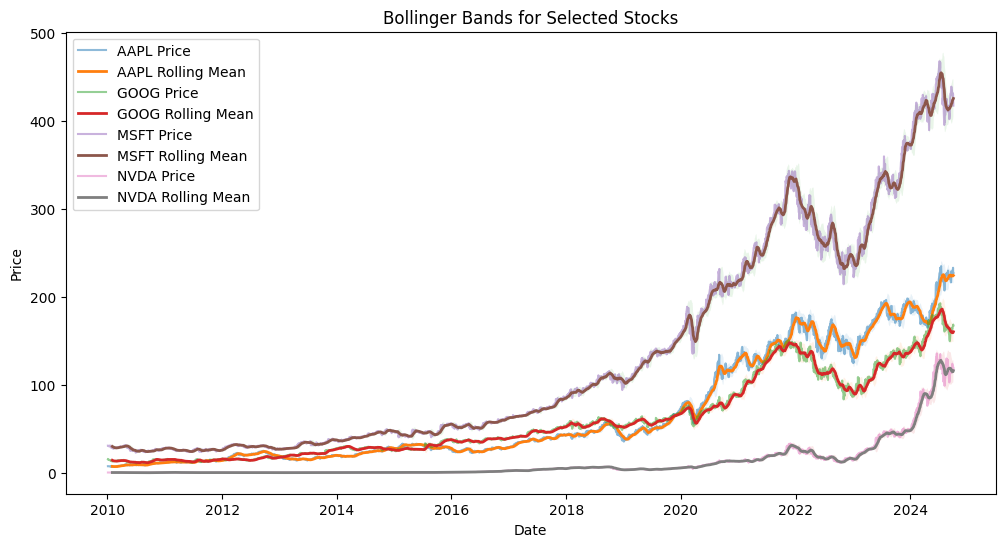

In [39]:
def calculate_bollinger_bands(data, window=20):
    rolling_mean = data['close'].rolling(window).mean()
    rolling_std = data['close'].rolling(window).std()
    upper_band = rolling_mean + (rolling_std * 2)
    lower_band = rolling_mean - (rolling_std * 2)
    return rolling_mean, upper_band, lower_band

plt.figure(figsize=(12, 6))
for symbol in symbols:
    stock_data = combined_data[combined_data['Symbol'] == symbol]
    rolling_mean, upper_band, lower_band = calculate_bollinger_bands(stock_data)

    plt.plot(stock_data['date'], stock_data['close'], label=f'{symbol} Price', alpha=0.5)
    plt.plot(stock_data['date'], rolling_mean, label=f'{symbol} Rolling Mean', linewidth=2)
    plt.fill_between(stock_data['date'], upper_band, lower_band, alpha=0.1)

plt.title('Bollinger Bands for Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
